# Logistic Regression Model



In [1]:
import numpy as np
import pandas as pd

### Dataset

Model using the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) 

Listing of attributes:

- \>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
colnames=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

train_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=colnames,header=None)
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train_df=train_df.replace(' ?',np.nan)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
train_df=train_df.dropna()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
train_df["income_bin"]=pd.get_dummies(train_df["income"],drop_first=True)
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [11]:
test_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",names=colnames,header=0)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [13]:
test_df=test_df.replace(" ?",np.nan)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
test_df=test_df.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education       15060 non-null  object
 4   education-num   15060 non-null  int64 
 5   marital-status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital-gain    15060 non-null  int64 
 11  capital-loss    15060 non-null  int64 
 12  hours-per-week  15060 non-null  int64 
 13  native-country  15060 non-null  object
 14  income          15060 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [15]:
test_df["income_bin"]=pd.get_dummies(test_df["income"],drop_first=True)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bin
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [99]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
 15  income_bin      16281 non-null  uint8 
dtypes: int64(6), object(9), uint8(1)
memory usage: 1.9+ MB


### Logistic Regression:

In [115]:
class logistic_regression:
    def __init__(self):
        self.weights=0
        self.bias=0
        self.losses=[]

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def init_weights(self,shape):
        W=np.zeros(shape)
        b=0
        return W,b

    def fit(self,data,target,lr=0.01,iters=1000,verbose=False):
        # print("data",data.shape)
        # print("target",target.shape)
        n=data.shape[0]   #features
        m=data.shape[1]   #samples
        # print("m",m)
        # print("n",n)
        self.weights,self.bias=self.init_weights((n,1))
        # print("W",self.weights.shape)
        assert target.shape == (1,m)

        # https://vitalflux.com/python-train-model-logistic-regression/
        # https://web.stanford.edu/~jurafsky/slp3/5.pdf
        for i in range(iters):
            # compute sigmoid
            X=np.dot(self.weights.T,data)+self.bias
            # print("X",X)
            y_hat=self.sigmoid(X)
            # print("y_hat",y_hat)


            # compute loss
            loss = -1/m * np.sum((target*np.log(y_hat) + (1-target)*np.log(1 - y_hat)))
            self.losses.append(loss)
            # print("loss",loss)

            # update values gd
            self.weights -= lr * data @ (y_hat - target).T / m
            # print("w",self.weights,self.weights.shape)
            self.bias -= lr * np.sum(y_hat-target)/m
            # print("b",self.bias,self.bias.shape)

            if verbose and i%10==0:
                print(f"Iteration {i}: loss {loss}")

    def predict(self,data):
        Z = np.dot(self.weights.T, data) + self.bias
        Y_hat = self.sigmoid(Z)
        return Y_hat

    def predict_classify(self,data,thres):
        predictions=(self.predict(data) >= thres).astype(int)
        return predictions

 

In [47]:
np.array([1,2,3,4]).reshape(-1,1) @ np.array([1,2,3,4]).reshape(1,-1) / 4

array([[0.25, 0.5 , 0.75, 1.  ],
       [0.5 , 1.  , 1.5 , 2.  ],
       [0.75, 1.5 , 2.25, 3.  ],
       [1.  , 2.  , 3.  , 4.  ]])

In [48]:
np.dot(np.dot(np.array([1,2,3,4]).reshape(-1,1),np.array([1,2,3,4]).reshape(-1,1).T)/4,np.array([1,2,3,4]).reshape(-1,1))

array([[ 7.5],
       [15. ],
       [22.5],
       [30. ]])

In [92]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_data1=train_df["fnlwgt"].to_numpy().reshape(-1,1)
scaler.fit(train_data1)
train_data1=scaler.transform(train_data1)
test_data1=test_df["fnlwgt"].to_numpy().reshape(-1,1)
test_data1=scaler.transform(test_data1)

logreg=logistic_regression()
logreg.fit(train_data1.T,train_df["income_bin"].to_numpy().reshape(1,-1))

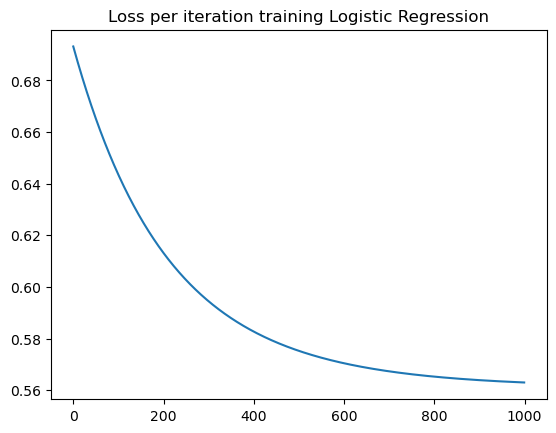

In [102]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(logreg.losses)
plt.title("Loss per iteration training Logistic Regression")
plt.show()

In [105]:
from sklearn.metrics import accuracy_score

# logreg.predict_classify(test_data1.T,thres=0.5).T.shape

accuracy1=accuracy_score(test_df["income_bin"],logreg.predict_classify(test_data1.T,thres=0.5).T)
print("Accuracy: ",accuracy1)

Accuracy:  0.7637737239727289


Now with multiple variables in input:

In [125]:
# scaler2=StandardScaler()
# print(train_df[["age","hours-per-week"]].to_numpy().shape)
train_data2=train_df[["age","hours-per-week"]].to_numpy()
# scaler2.fit(train_data2)
# train_data2=scaler.transform(train_data2)
test_data2=test_df[["age","hours-per-week"]].to_numpy()
# test_data2=scaler.transform(test_data2)

logreg2=logistic_regression()
logreg2.fit(train_data2.T,train_df["income_bin"].to_numpy().reshape(1,-1))
accuracy2=accuracy_score(test_df["income_bin"],logreg2.predict_classify(test_data2.T,thres=0.5).T)
print("Accuracy 1 variables: ",accuracy1)
print("Accuracy 2 variables: ",accuracy2)

Accuracy 1 variables:  0.7637737239727289
Accuracy 2 variables:  0.7637737239727289


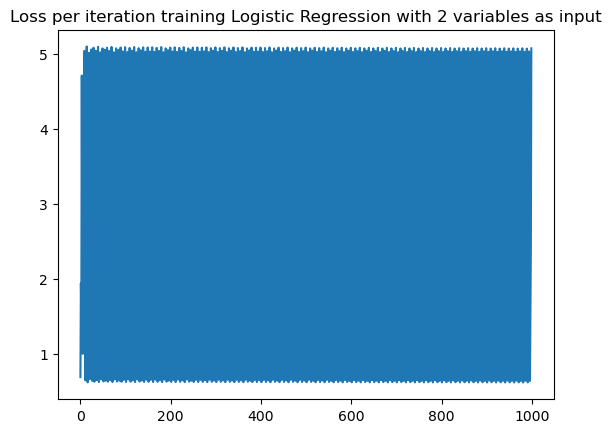

In [126]:
plt.figure()
plt.plot(logreg2.losses)
plt.title("Loss per iteration training Logistic Regression with 2 variables as input")
plt.show()

The result looks weird by looking at the loss of the training!

ლ (ಠ益ಠლ)



In [143]:
logreg2=logistic_regression()
logreg2.fit(train_data2.T,train_df["income_bin"].to_numpy().reshape(1,-1),lr=0.003)
accuracy2=accuracy_score(test_df["income_bin"],logreg2.predict_classify(test_data2.T,thres=0.5).T)
print("Accuracy 1 variables: ",accuracy1)
print("Accuracy 2 variables: ",accuracy2)

Accuracy 1 variables:  0.7637737239727289
Accuracy 2 variables:  0.7637737239727289


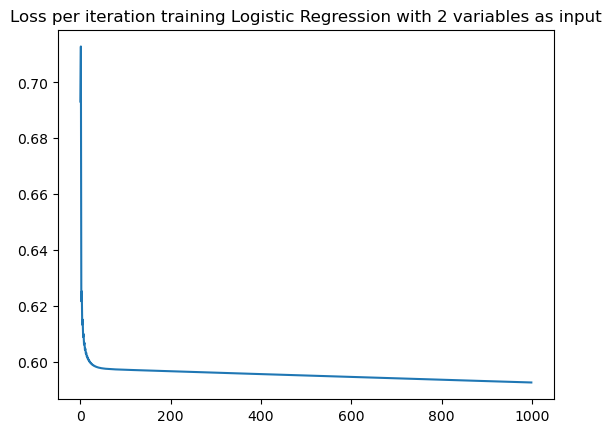

In [144]:
plt.figure()
plt.plot(logreg2.losses)
plt.title("Loss per iteration training Logistic Regression with 2 variables as input")
plt.show()

With a lower learning rate for the gradient descent, the optimization looks better